In [8]:
import pandas as pd
import seaborn as sns

In [9]:
# tips 데이터셋 로드
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사인원과 성별 따른 그룹화를 해서 팁의 평균비율을 구하고 그래프로 시각화(바그래프 사용)

In [10]:
tips.columns = ['총금액', '팁', '성별', '흡연여부',' 요일', '시간', '식사인원']

In [11]:
tips['총금액'] = tips['총금액'].round(1)
tips['팁'] = tips['팁'].round(1)

In [12]:
import matplotlib.pyplot as plt

In [13]:
# 팁의 비율 파생변수 생성
# 팁/ 총금액 * 100
tips['팁 비율'] = tips['팁'] / tips['총금액']* 100

In [14]:
tips

,총금액,팁,성별,흡연여부,요일,시간,식사인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146
...,...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3,20.344828
240,27.2,2.0,Female,Yes,Sat,Dinner,2,7.352941
241,22.7,2.0,Male,Yes,Sat,Dinner,2,8.810573
242,17.8,1.8,Male,No,Sat,Dinner,2,10.112360


In [15]:
# 식사인원과 성별 따른 그룹화를 해서 팁의 평균비율을 구하는 코드
group_data = tips[['식사인원','성별', '팁 비율']].groupby(['식사인원','성별']).mean()

<Axes: xlabel='식사인원,성별'>

c:\Users\bjw\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  func(*args, **kwargs)
c:\Users\bjw\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
c:\Users\bjw\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
c:\Users\bjw\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\bjw\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)

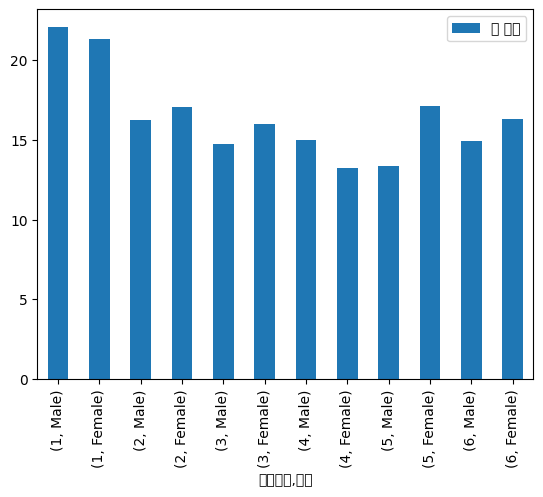

In [16]:
group_data.plot.bar()

In [17]:
# window에사 matplotlib 폰트 설정 변경
#if platform.system()=="Darwin":
#plt.rc('font', family = 'AppleGothic')
#else:
plt.rc('font',family='Malgun Gothic')

In [18]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['식사인원', '성별'])

<function matplotlib.pyplot.show(close=None, block=None)>

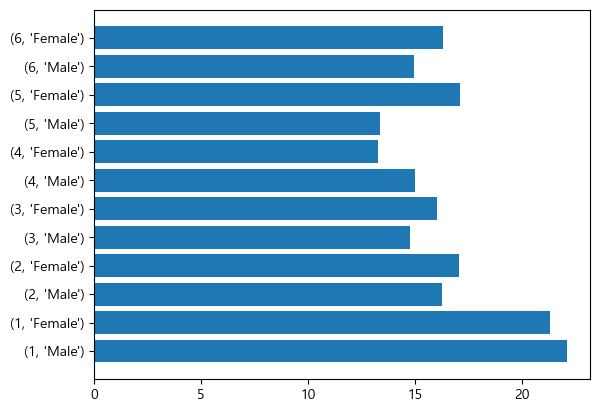

In [19]:
x= list(range(0, len(group_data.index),1))
y= group_data['팁 비율']

#print(x)
#print(y)
plt.barh(x,y, label = '팁 비율')
plt.yticks(x,group_data.index)
plt.show

In [20]:
group_data

팁 비율
식사인원 성별               
1    Male    22.093023
     Female  21.322912
2    Male    16.273796
     Female  17.053626
3    Male    14.763093
     Female  16.025679
4    Male    15.017047
     Female  13.267871
5    Male    13.371547
     Female  17.114094
6    Male    14.953486
     Female  16.306239

In [21]:
# 남자의 데이터 프레임
# 여자의 데이터 프레임으로 나눈다
male_data = pd.DataFrame()
female_data = pd.DataFrame()
for i in group_data.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, group_data.loc[[i]]])
    else:
        female_data = pd.concat([female_data, group_data.loc[[i]]])


<function matplotlib.pyplot.show(close=None, block=None)>

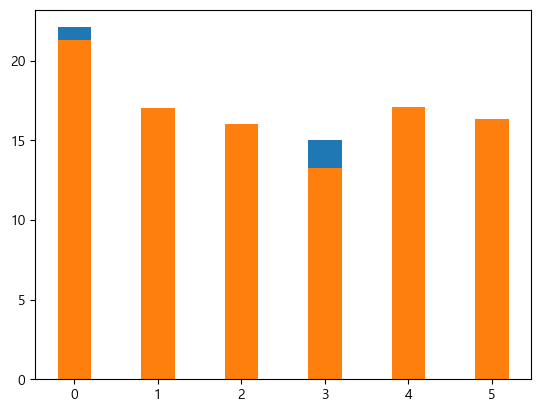

In [22]:
# 그래프 만들기
x= list(range(len(male_data)))
y= male_data['팁 비율']
x2=list(range(len(female_data)))
y2=female_data['팁 비율']
plt.bar(x,y, width=0.4)
plt.bar(x2,y2, width=0.4)
plt.show

### pivot_table
1. 그룹화
2. 인덱스, 컬럼을 기준으로그룹화
3. 데이터 집계를 나타낸다

In [23]:
pivot_data = pd.pivot_table(
    tips,
    index ='식사인원',# 
    columns ='성별', # 성별로 그룹화
    values='팁 비율',# 팁 비율로 평균값을 보여주겠다
    aggfunc='mean' # 평균값을 보여주겠다
)

<Axes: xlabel='식사인원'>

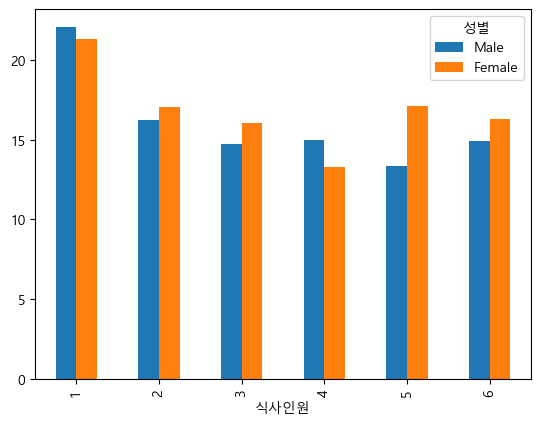

In [24]:
pivot_data.plot.bar()